<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_7_fisherlds.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BYU CS 473 — Fisher’s Linear Discriminant Analysis (FLDA)

In this assignment, you will learn about **Fisher’s Linear Discriminant Analysis** (FLDA), a supervised dimensionality reduction technique.  

You will compare FLDA to PCA, derive the optimal 1D projection, and extend the idea to higher dimensions and multiple classes.

---

## Learning Goals
- Understand the difference between PCA and FLDA  
- Visualize PCA vs FLDA projection directions  
- Derive the optimal 1D Fisher discriminant  
- Extend FLDA to higher dimensions and multiple classes  


## 1. What is Fisher’s Linear Discriminant?

- **PCA**: finds directions of maximum variance (unsupervised).  
- **FLDA**: finds directions that best separate labeled classes (supervised).  

**Key idea:**  
FLDA maximizes the **between-class variance** while minimizing the **within-class variance**.


### Exercise 1
In your own words, explain the difference between PCA and FLDA.  
When would FLDA be more useful than PCA?


PCA is about minimizing the input needed to map the data with reasonable accuracy. FLDA is about finding a border that accurately separates the data into correct and distinct classes.

FLDA would be more useful when you're trying to classify data, especially when trying to generalize to new data. PCA would be more useful in pre-classification; determining what data points are most useful for analysis.

## 2. Example: PCA vs FLDA

We will simulate 2D data with two classes, and compare:
1. PCA direction  
2. FLDA direction  
3. Projection onto PCA direction  
4. Projection onto FLDA direction


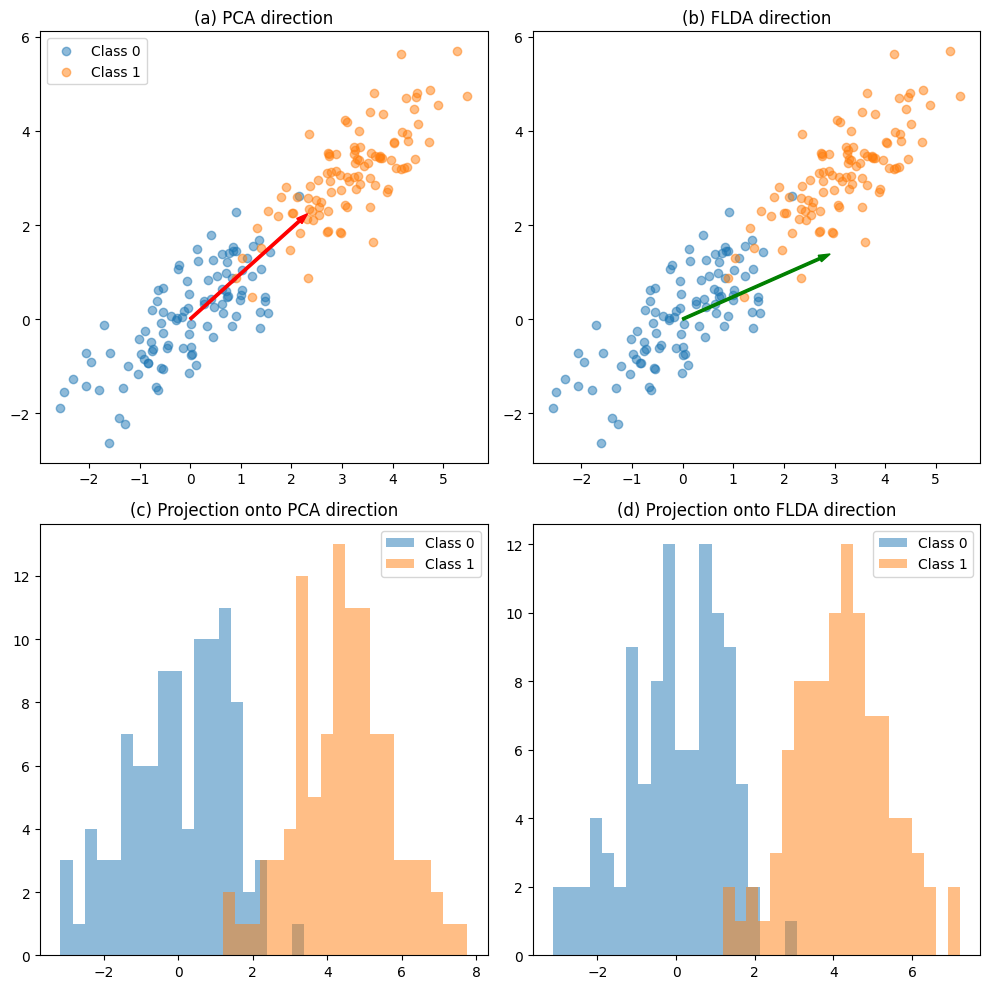

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data
np.random.seed(0)
mean1, cov1 = [0,0], [[1,0.75],[0.75,1]]
mean2, cov2 = [3,3], [[1,0.75],[0.75,1]]

X1 = np.random.multivariate_normal(mean1, cov1, 100)
X2 = np.random.multivariate_normal(mean2, cov2, 100)
X = np.vstack((X1, X2))
y = np.array([0]*100 + [1]*100)

# Fit PCA
pca = PCA(n_components=1).fit(X)
pca_dir = pca.components_[0]

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=1).fit(X, y)
lda_dir = lda.coef_[0] / np.linalg.norm(lda.coef_[0])

# Graphs
fig, axes = plt.subplots(2,2, figsize=(10,10))

# (a) PCA direction
axes[0,0].scatter(X1[:,0], X1[:,1], label="Class 0", alpha=0.5)
axes[0,0].scatter(X2[:,0], X2[:,1], label="Class 1", alpha=0.5)
axes[0,0].arrow(0,0, pca_dir[0]*3, pca_dir[1]*3, color="red", width=0.05)
axes[0,0].set_title("(a) PCA direction")
axes[0,0].legend()

# (b) FLDA direction
axes[0,1].scatter(X1[:,0], X1[:,1], alpha=0.5)
axes[0,1].scatter(X2[:,0], X2[:,1], alpha=0.5)
axes[0,1].arrow(0,0, lda_dir[0]*3, lda_dir[1]*3, color="green", width=0.05)
axes[0,1].set_title("(b) FLDA direction")

# (c) Projection onto PCA direction
proj_pca = X @ pca_dir
axes[1,0].hist(proj_pca[y==0], bins=20, alpha=0.5, label="Class 0")
axes[1,0].hist(proj_pca[y==1], bins=20, alpha=0.5, label="Class 1")
axes[1,0].set_title("(c) Projection onto PCA direction")
axes[1,0].legend()

# (d) Projection onto FLDA direction
proj_lda = X @ lda_dir
axes[1,1].hist(proj_lda[y==0], bins=20, alpha=0.5, label="Class 0")
axes[1,1].hist(proj_lda[y==1], bins=20, alpha=0.5, label="Class 1")
axes[1,1].set_title("(d) Projection onto FLDA direction")
axes[1,1].legend()

plt.tight_layout()
plt.show()


### Exercise 2
- Which projection better separates the two classes?  
- Why does PCA fail to find the best class separation?


FLDA has better separation, because that's what it looks for! PCA is looking for the plane (in this case, the line) that best approximates the "flow" of the data, without regard for classes. FLDA, however, is specifically looking at classes, trying to find the plane (in this case, again, the line) the best shows the difference between classes.

## 3. Derivation of Optimal 1D Projection

We want a projection vector \(w\) such that the projected means are far apart relative to variance within each class.

- Between-class scatter:
$S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T$

- Within-class scatter:
$S_W = \sum_{i \in C_1}(x_i - \mu_1)(x_i - \mu_1)^T + \sum_{i \in C_2}(x_i - \mu_2)(x_i - \mu_2)^T$

Optimization problem:
$w^* = \arg \max_w \frac{w^T S_B w}{w^T S_W w}$

Solution:
$w^* = S_W^{-1}(\mu_1 - \mu_2)$


### Exercise 3 (Optional 5% Extra Credit)
Derive the formula for $w^*$ starting from the optimization problem.  
(Hint: use the Rayleigh quotient and Lagrange multipliers.)


Start with the optimization problem:
$w^* = \arg \max_w \frac{w^T S_B w}{w^T S_W w}$

Since the scale of 𝑤 does not affect the ratio, we can constrain ${w^T S_W w}$, which allows us to maximize ${w^T S_B w}$ by setting ${w^T S_W w = 1}$

Set up the Lagrangian:
- The Lagrangian is defined as: 𝐿(𝑤,𝜆) = 𝑓(𝑤)−𝜆(𝑔(𝑤))
- maximize ${f(w) = w^T S_B w}$ subject to ${g(w) = w^T S_W w - 1 = 0}$
- $𝐿(𝑤,𝜆) = {w^T S_B w} − 𝜆({w^T S_W w} - 1)$

Take the derivative with respect to 𝑤:
$\frac{∂𝐿}{∂𝑤} = 2{S_B w} - 2𝜆{S_W w} = 0$

Simplify to ${S_B w} = 𝜆{S_W w}$

Substitute $S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T$:
${((\mu_1 - \mu_2)(\mu_1 - \mu_2)^T) w} = 𝜆{S_W w}$

Simplify the left-hand side: Let 𝑚 = $(\mu_1 - \mu_2)$.
- $𝑚(m^Tw) = 𝜆{S_W w}$
- This means $m^Tw$ is a scalar, so we can write: ${S_W w} ∝ 𝑚$

Divide both sides by ${S_W}$: w ∝ $S_W^{-1} 𝑚$

𝑚 = $(\mu_1 - \mu_2)$: w ∝ $S_W^{-1} (\mu_1 - \mu_2)$

$w^* = S_W^{-1}(\mu_1 - \mu_2)$

## 4. Extension to Higher Dimensions and Multiple Classes

- For **k classes**, FLDA finds at most \(k-1\) discriminant directions.  
- The generalization uses scatter matrices:

$S_B = \sum_{c=1}^k n_c (\mu_c - \mu)(\mu_c - \mu)^T$
$S_W = \sum_{c=1}^k \sum_{x \in c} (x - \mu_c)(x - \mu_c)^T$

- Solve the generalized eigenvalue problem:

$S_W^{-1} S_B w = \lambda w$

- The top eigenvectors form the discriminant subspace.


### Exercise 4
Using scikit-learn’s `LinearDiscriminantAnalysis`, train an FLDA model on the **Iris dataset** (3 classes).  
- Project the data onto 2 FLDA components.  
- Plot the classes in the new space.  
- How well does FLDA separate the classes?


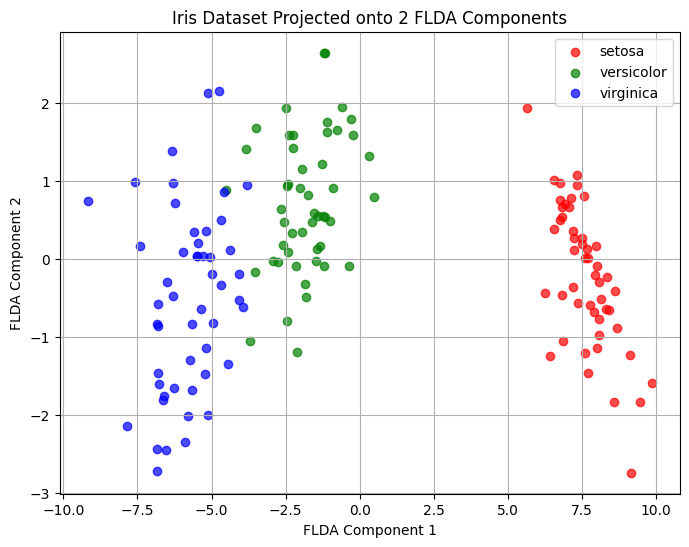

In [2]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data       # Features: 4D
y = iris.target     # Labels: 3 classes
class_names = iris.target_names

# Create LDA model with 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the data in the 2D FLDA space
plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
for i, color, label in zip([0,1,2], colors, class_names):
    plt.scatter(X_lda[y==i, 0], X_lda[y==i, 1], alpha=0.7, color=color, label=label)

plt.xlabel('FLDA Component 1')
plt.ylabel('FLDA Component 2')
plt.title('Iris Dataset Projected onto 2 FLDA Components')
plt.legend()
plt.grid(True)
plt.show()


FLDA separates the classes well. Setosa is well removed from the other two, and versicolor and virginica have very little overlap.

## 5. Reflection

### Exercise 5
Answer in 2–3 sentences each:

1. How does FLDA differ from PCA in its objective?  
2. Why is FLDA limited to at most k−1 dimensions for k classes?  
3. What practical problems might arise when using FLDA?


1. PCA is looking for similarities, while FLDA is looking for differences.
2. FLDA is limited to at most k−1 dimensions for k classes for the same reason as Stars and Bars: dividing k groups only requires k−1 divisions. Any more is redundant.
3. Practical problems that might arise when using FLDA include small sample size, not being linearly separable, and strong outliers.